In [38]:
import numpy as np
import xarray as xr
import netCDF4 as nc
import pandas as pd
import ES3 
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
ds = xr.open_dataset('era5_18_21.nc')

In [3]:
df = ds.sel(longitude=-23, latitude=-43).to_dataframe()

In [4]:
df.pop('latitude')
df.pop('longitude')

time
2018-01-01 00:00:00   -23.0
2018-01-01 01:00:00   -23.0
2018-01-01 02:00:00   -23.0
2018-01-01 03:00:00   -23.0
2018-01-01 04:00:00   -23.0
                       ... 
2021-12-31 19:00:00   -23.0
2021-12-31 20:00:00   -23.0
2021-12-31 21:00:00   -23.0
2021-12-31 22:00:00   -23.0
2021-12-31 23:00:00   -23.0
Name: longitude, Length: 35064, dtype: float32

In [5]:
boia1 = ES3.trata_dado('dados/SIMCOSTA_RJ-1_OCEAN_2015-07-29_2016-10-13.csv')
boia1.columns = ['Hs1', 'Tp1', 'Dir1', 'DirN1', 'Decl1']

In [6]:
boia2 = ES3.trata_dado('dados/SIMCOSTA_RJ-2_OCEAN_2015-07-29_2016-12-20.csv')
boia2.columns = ['Hs2', 'Tp2', 'Dir2', 'DirN2', 'Decl2']

In [7]:
boia3 = ES3.trata_dado('dados/SIMCOSTA_RJ-3_OCEAN_2016-07-14_2022-01-26.csv')
boia3.columns = ['Hs3', 'Tp3,', 'Dir3', 'DirN3', 'Decl3']

In [8]:
boia4 = ES3.trata_dado('dados/SIMCOSTA_RJ-4_OCEAN_2017-08-28_2022-01-25.csv')
boia4.columns = ['Hs4', 'Tp4', 'Dir4', 'DirN4', 'Decl4']

In [9]:
geral = pd.concat([boia1, boia2, boia3, boia4, df], axis=1)

In [12]:
geral.index[]

DatetimeIndex(['2015-07-29 20:25:00', '2015-07-29 21:25:00',
               '2015-07-29 22:25:00', '2015-07-29 23:25:00',
               '2015-07-30 00:25:00', '2015-07-30 01:25:00',
               '2015-07-30 02:25:00', '2015-07-30 03:25:00',
               '2015-07-30 04:25:00', '2015-07-30 05:25:00',
               ...
               '2022-01-26 19:21:40', '2022-01-26 19:51:40',
               '2022-01-26 20:21:40', '2022-01-26 20:51:40',
               '2022-01-26 21:21:40', '2022-01-26 21:51:40',
               '2022-01-26 22:21:40', '2022-01-26 22:51:40',
               '2022-01-26 23:21:40', '2022-01-26 23:51:40'],
              dtype='datetime64[ns]', length=147305, freq=None)

In [24]:
geral.loc['2015-01-01':'2019-02-01']

,Hs1,Tp1,Dir1,DirN1,Decl1,Hs2,Tp2,Dir2,DirN2,Decl2,...,DirN3,Decl3,Hs4,Tp4,Dir4,DirN4,Decl4,mdww,mwp,swh
2015-07-29 20:25:00,0.79,8.7,178.0,155.45,-22.55,0.46,10.0,174.0,151.46,-22.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-29 21:25:00,0.84,9.1,178.0,155.45,-22.55,0.43,9.5,173.0,150.46,-22.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-29 22:25:00,0.85,8.3,172.0,149.45,-22.55,0.35,9.1,179.0,156.46,-22.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-29 23:25:00,0.84,10.0,167.0,144.45,NaN,0.39,10.0,172.0,149.46,-22.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-30 00:25:00,0.81,8.3,171.0,148.45,-22.55,0.37,10.5,177.0,154.46,-22.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-01 22:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128.12,-22.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-01 22:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.66,15.4,161.0,138.11,-22.89,NaN,NaN,NaN
2019-02-01 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.041382,8.366951,2.557083
2019-02-01 23:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,125.12,-22.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
geral_treated = geral.resample('H').mean()

In [44]:
geral_treated['2015-01-01':'2019-02-01']

,Hs1,Tp1,Dir1,DirN1,Decl1,Hs2,Tp2,Dir2,DirN2,Decl2,...,DirN3,Decl3,Hs4,Tp4,Dir4,DirN4,Decl4,mdww,mwp,swh
2015-07-29 20:00:00,0.79,8.7,178.0,155.45,-22.55,0.46,10.0,174.0,151.46,-22.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-29 21:00:00,0.84,9.1,178.0,155.45,-22.55,0.43,9.5,173.0,150.46,-22.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-29 22:00:00,0.85,8.3,172.0,149.45,-22.55,0.35,9.1,179.0,156.46,-22.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-29 23:00:00,0.84,10.0,167.0,144.45,NaN,0.39,10.0,172.0,149.46,-22.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-30 00:00:00,0.81,8.3,171.0,148.45,-22.55,0.37,10.5,177.0,154.46,-22.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-01 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.62,-22.88,0.655,16.70,168.0,145.11,-22.89,273.047302,8.101009,2.560224
2019-02-01 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124.62,-22.88,0.600,16.70,169.5,146.61,-22.89,271.690460,8.120455,2.554641
2019-02-01 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,125.62,-22.88,0.675,16.05,163.0,140.11,-22.89,273.212097,8.163205,2.554292
2019-02-01 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128.12,-22.88,0.645,11.40,157.0,134.11,-22.89,273.305481,8.239985,2.557781


In [52]:
geral_treated['Hs4'].corr(geral_treated['swh'])

0.08019942199894396

In [32]:
geral['Hs4'].corr(geral['swh'])

nan

In [35]:
geral['2015-01-01':'2019-02-01']['swh']

2015-07-29 20:25:00         NaN
2015-07-29 21:25:00         NaN
2015-07-29 22:25:00         NaN
2015-07-29 23:25:00         NaN
2015-07-30 00:25:00         NaN
                         ...   
2019-02-01 22:53:00         NaN
2019-02-01 22:55:00         NaN
2019-02-01 23:00:00    2.557083
2019-02-01 23:23:00         NaN
2019-02-01 23:25:00         NaN
Name: swh, Length: 73938, dtype: float32

(18383.0, 18506.0)

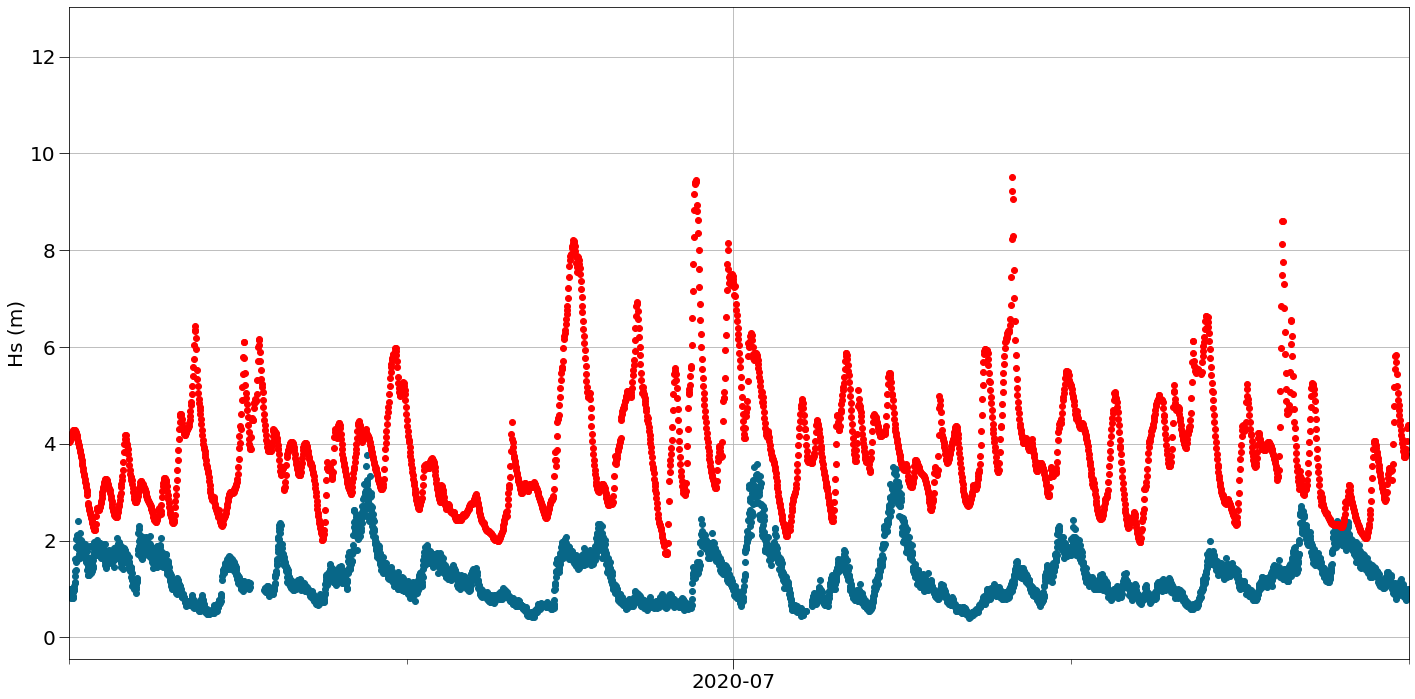

In [57]:
fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)
ax.plot(geral['Hs4'], marker = 'o', color = '#086788', linestyle = 'none')
# ax.plot(geral_treated['Hs2'], marker = 'o', color = 'red', linestyle = 'none')
ax.plot(geral_treated['swh'], marker = 'o', color = 'red', linestyle = 'none')

ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

# ax.set_ylim(0.1,7)
ax.set_xlim(datetime(2020,5,1), datetime(2020,9,1))



###########################################################################

# plt.title('RJ1', fontsize = 40)


In [36]:
geral_treated['Hs1']

2015-07-29 20:00:00    0.79
2015-07-29 21:00:00    0.84
2015-07-29 22:00:00    0.85
2015-07-29 23:00:00    0.84
2015-07-30 00:00:00    0.81
                       ... 
2022-01-26 19:00:00    0.00
2022-01-26 20:00:00    0.00
2022-01-26 21:00:00    0.00
2022-01-26 22:00:00    0.00
2022-01-26 23:00:00    0.00
Freq: H, Name: Hs1, Length: 56956, dtype: float64

In [48]:
hour = pd.to_timedelta(geral.index.hour, unit='H')

In [55]:
geral.groupby(hour).mean()

,Hs1,Tp1,Dir1,DirN1,Decl1,Hs2,Tp2,Dir2,DirN2,Decl2,...,DirN3,Decl3,Hs4,Tp4,Dir4,DirN4,Decl4,mdww,mwp,swh
0 days 00:00:00,1.227606,11.639928,186.101327,163.906185,-22.614943,0.486792,10.110208,163.510417,140.891792,-22.618446,...,146.845598,-22.803042,1.193666,10.561349,180.594898,157.724678,-22.872145,231.583237,9.048060,3.406093
0 days 01:00:00,1.216861,11.627932,186.521161,164.116993,-22.615320,0.484341,10.017678,164.188285,141.569571,-22.618558,...,146.396667,-22.801487,1.183635,10.635171,179.410761,156.542673,-22.869962,232.261948,9.036160,3.407401
0 days 02:00:00,1.208307,11.678979,186.916160,164.722145,-22.615058,0.483150,10.024532,164.148649,141.529969,-22.618448,...,145.943389,-22.802002,1.178414,10.646101,178.254333,155.385706,-22.870625,233.424622,9.024144,3.409829
0 days 03:00:00,1.209247,11.673576,187.192727,164.996868,-22.615423,0.484922,9.982690,164.018770,141.400177,-22.618391,...,145.900445,-22.802508,1.178351,10.601953,177.878038,155.008772,-22.871157,234.630386,9.013342,3.413893
0 days 04:00:00,1.198685,11.694654,187.432564,165.237188,-22.615057,0.481854,10.079896,165.258333,142.639615,-22.618555,...,145.466076,-22.802898,1.175266,10.620349,177.921397,155.052301,-22.871274,234.435684,9.005891,3.417018
0 days 05:00:00,1.197570,11.705091,187.192727,164.788184,-22.614994,0.480301,10.131809,166.266112,143.647287,-22.618770,...,146.110041,-22.803470,1.164723,10.633934,178.340626,155.472553,-22.869897,233.870285,8.999896,3.419423
0 days 06:00:00,1.202228,11.828083,186.908425,164.716297,-22.615309,0.472050,10.108117,167.877211,145.258502,-22.618488,...,146.246550,-22.803186,1.152632,10.615557,179.304667,156.436772,-22.869758,234.385178,8.997885,3.420627
0 days 07:00:00,1.211818,11.737377,186.183824,164.875648,-22.614955,0.469539,10.281885,168.119372,145.500796,-22.618462,...,146.603810,-22.804461,1.153118,10.683947,180.753947,157.885237,-22.870783,232.980164,8.997933,3.419271
0 days 08:00:00,1.214721,11.677342,186.341772,163.728759,-22.615007,0.475730,10.267459,167.980541,145.362216,-22.618281,...,146.902461,-22.802320,1.157296,10.745929,181.722124,158.852761,-22.870941,233.124039,9.003416,3.419742
0 days 09:00:00,1.217458,11.749424,185.688860,163.076018,-22.614891,0.478576,10.314779,167.128371,144.509741,-22.618658,...,147.277163,-22.802713,1.145919,10.665029,181.887231,159.018442,-22.870700,234.066177,9.008553,3.419487
